In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
from colicoords import Data, CellListPlot, IterCellPlot, AutoIterCellPlot, save, load, CellPlot
import os
import mahotas as mh

In [2]:
import colicoords
colicoords.__file__

'C:\\Users\\jhs\\Programming\\cc_master\\colicoords\\__init__.py'

In [3]:
c41_01_raw = load('c41_01_cell_raw.hdf5')
c41_02_raw = load('c41_02_cell_raw.hdf5')
len(c41_01_raw), len(c41_02_raw)

(4278, 1688)

In [4]:
c41_01_binary = c41_01_raw.copy()
res_c41_01 = c41_01_binary.optimize_mp()

In [5]:
c41_02_binary = c41_02_raw.copy()
res_c41_02 = c41_02_binary.optimize_mp()

In [6]:
bn = ~np.equal(c41_01_binary, None)

In [7]:
obj_c41_01 = np.array([r.objective_value for r in np.array(res_c41_01)[bn]])
a_c41_01 = np.array([c.data.binary_img.sum() for c in c41_01_binary[bn]])
f = obj_c41_01 / a_c41_01

<IPython.core.display.Javascript object>


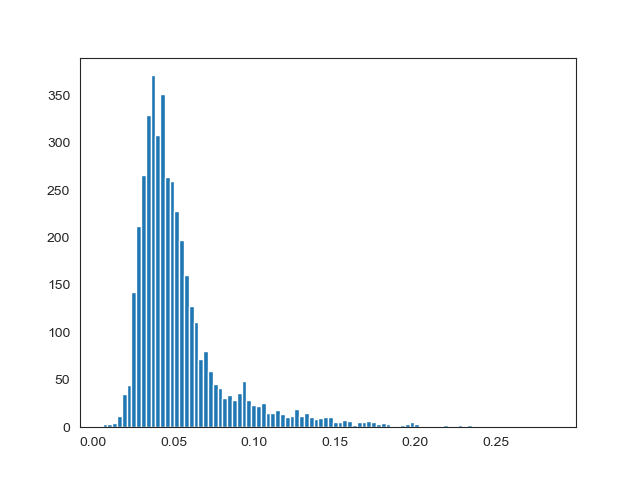

In [8]:
plt.figure()
h = plt.hist(f, bins='fd')

<IPython.core.display.Javascript object>


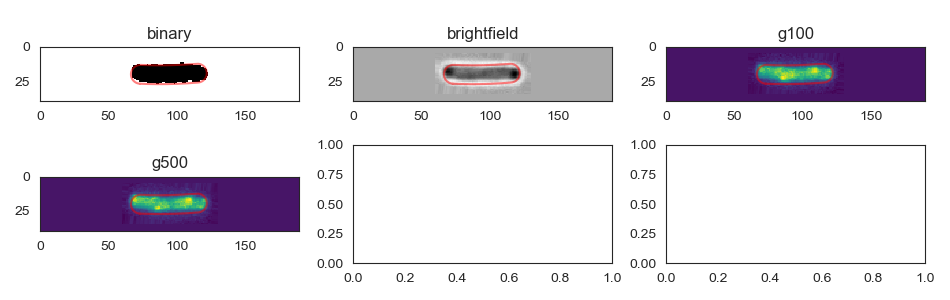

In [9]:
b = f < 0.1
aicp = AutoIterCellPlot(c41_01_binary[bn][b])
aicp.plot()

In [11]:
c41_01_selected = c41_01_binary[bn][b]

In [12]:
save('c41_01_binary_opt.hdf5', c41_01_selected)

In [13]:
bn = ~np.equal(res_c41_02, None)

In [14]:
obj_c41_02 = np.array([r.objective_value for r in np.array(res_c41_02)[bn]])
a_c41_02 = np.array([c.data.binary_img.sum() for c in c41_02_binary[bn]])
f = obj_c41_02 / a_c41_02

<IPython.core.display.Javascript object>


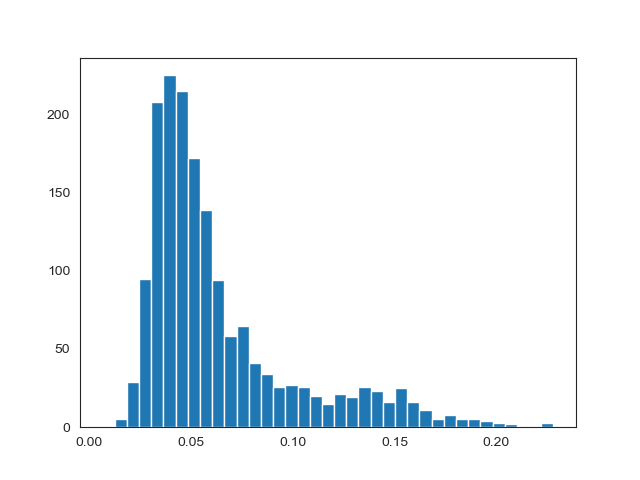

In [15]:
plt.figure()
h = plt.hist(f, bins='fd')

<IPython.core.display.Javascript object>


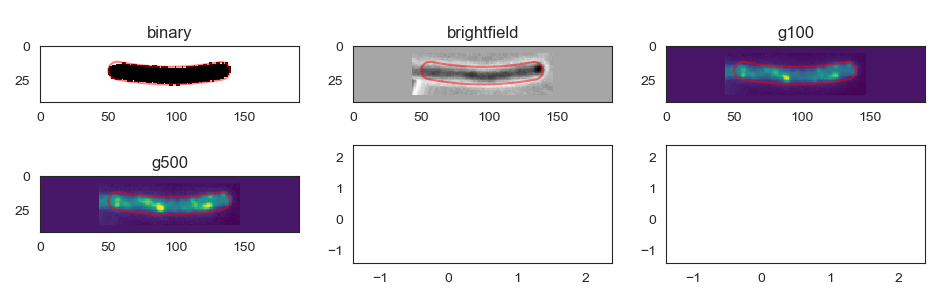

In [37]:
b = f < 0.1
aicp = AutoIterCellPlot(c41_02_binary[bn][b])
aicp.plot()

In [38]:
c41_02_selected = c41_02_binary[bn][b]

In [39]:
save('c41_02_binary_opt.hdf5', c41_02_selected)